In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [55]:
tweets_df = pd.read_csv('/Users/nitanshjain/Documents/Projects/Twitter_Data_Analysis/v2/data/tweets_cleaned_translated_v2.csv')
tweets_df.tweet = tweets_df.tweet_translated
tweets_df.drop(['tweet_translated'], axis=1, inplace=True)
print(tweets_df.shape)
tweets_df.head()

(17913, 5)


,tweet_id,tweet,city,year,tweet_translated
0,0,bad thing say government medical spare operati...,Mumbai,2022,bad thing say government medical spare operati...
1,1,netas family admitted government hospital priv...,Mumbai,2022,netas family admitted government hospital priv...
2,2,govandi one hotspot well respiratory disease d...,Mumbai,2022,govandi one hotspot well respiratory disease f...
3,3,till medical negligence exist government hospi...,Mumbai,2022,till medical negligence exist government hospi...
4,4,doctor reading also government hospital resident,Mumbai,2022,doctor reading also government hospital resident


In [4]:
print('Tweets by City\n')
print(tweets_df['city'].value_counts())

print('Tweets by Year\n')
print(tweets_df['year'].value_counts())

Tweets by City

Delhi        6798
Mumbai       4597
Hyderabad    2403
Bangalore    2299
Kolkata      1020
Chennai       796
Name: city, dtype: int64
Tweets by Year

2020    6003
2021    5013
2019    2597
2022    2328
2018    1972
Name: year, dtype: int64


# Pre Sentiment Analysis

In [51]:
wc = WordCloud(stopwords=['acronym', 'hospital', 'terminal', 'rich', 'environment', 'government', 'doctor', 'understand', 'mean', 'patient'], min_word_length=5, background_color='white', colormap="Dark2", max_words=1000, width=800, height=400, random_state=42)

Bangalore
Chennai
Delhi
Hyderabad
Kolkata
Mumbai


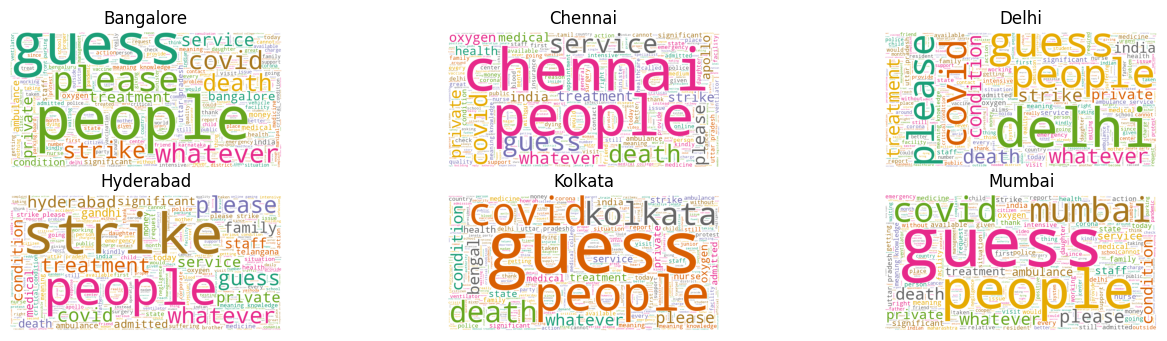

In [52]:
text = tweets_df.groupby('city')['tweet'].apply(lambda x:x.str.cat(sep=" "))
# cities = ['Mumbai', 'Delhi', 'Kolkata',  'Chennai', 'Bangalore', 'Hyderabad']
cities = ['Bangalore', 'Chennai', 'Delhi',  'Hyderabad', 'Kolkata', 'Mumbai']


text = text.to_frame()
text.index = cities

# creating a word cloud for all the tweets city wise
plt.rcParams['figure.figsize'] = [16, 6]


for index, city in enumerate(text.index):
    print(city)
    wc.generate(text.tweet[city])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(cities[index])
    
plt.show()                                     

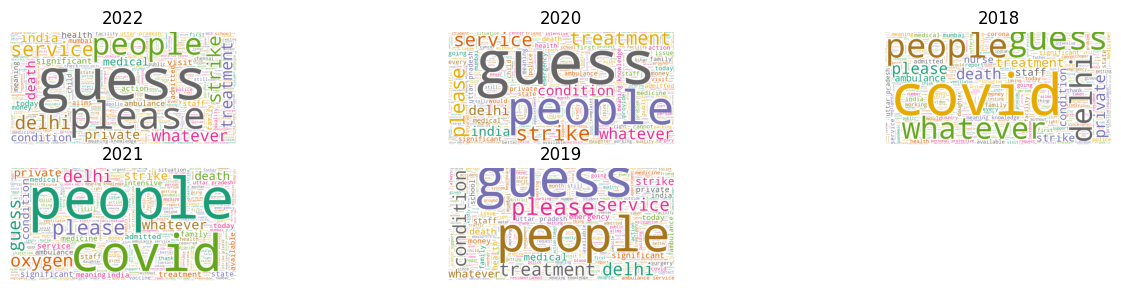

In [53]:
text = tweets_df.groupby('year')['tweet'].apply(lambda x:x.str.cat(sep=" "))
# years = ['2018', '2019', '2020', '2021', '2022']
years = ['2022', '2020', '2018', '2021', '2019']

text = text.to_frame()
text.index = years

# creating a word cloud for all the tweets city wise
plt.rcParams['figure.figsize'] = [16, 5]

for index, year in enumerate(text.index):
    wc.generate(text.tweet[year])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(years[index])
    
plt.show()                                     

# Post Sentiment Analysis